In [1]:
import warnings
warnings.filterwarnings('ignore')

# IMPORT LIBRARYS

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB

# IMPORT FILE

In [3]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape

(284807, 31)

# CLEANING AND PRE-PROCESSING

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
data["Hour"] = data["Time"].apply(lambda x: np.ceil(float(x)/3600) % 24)
data["Hour"] = data["Hour"].astype("int")

# EXPLORATORY DATA ANALYTICS

In [8]:
data[['Time', 'Amount', 'Class']].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


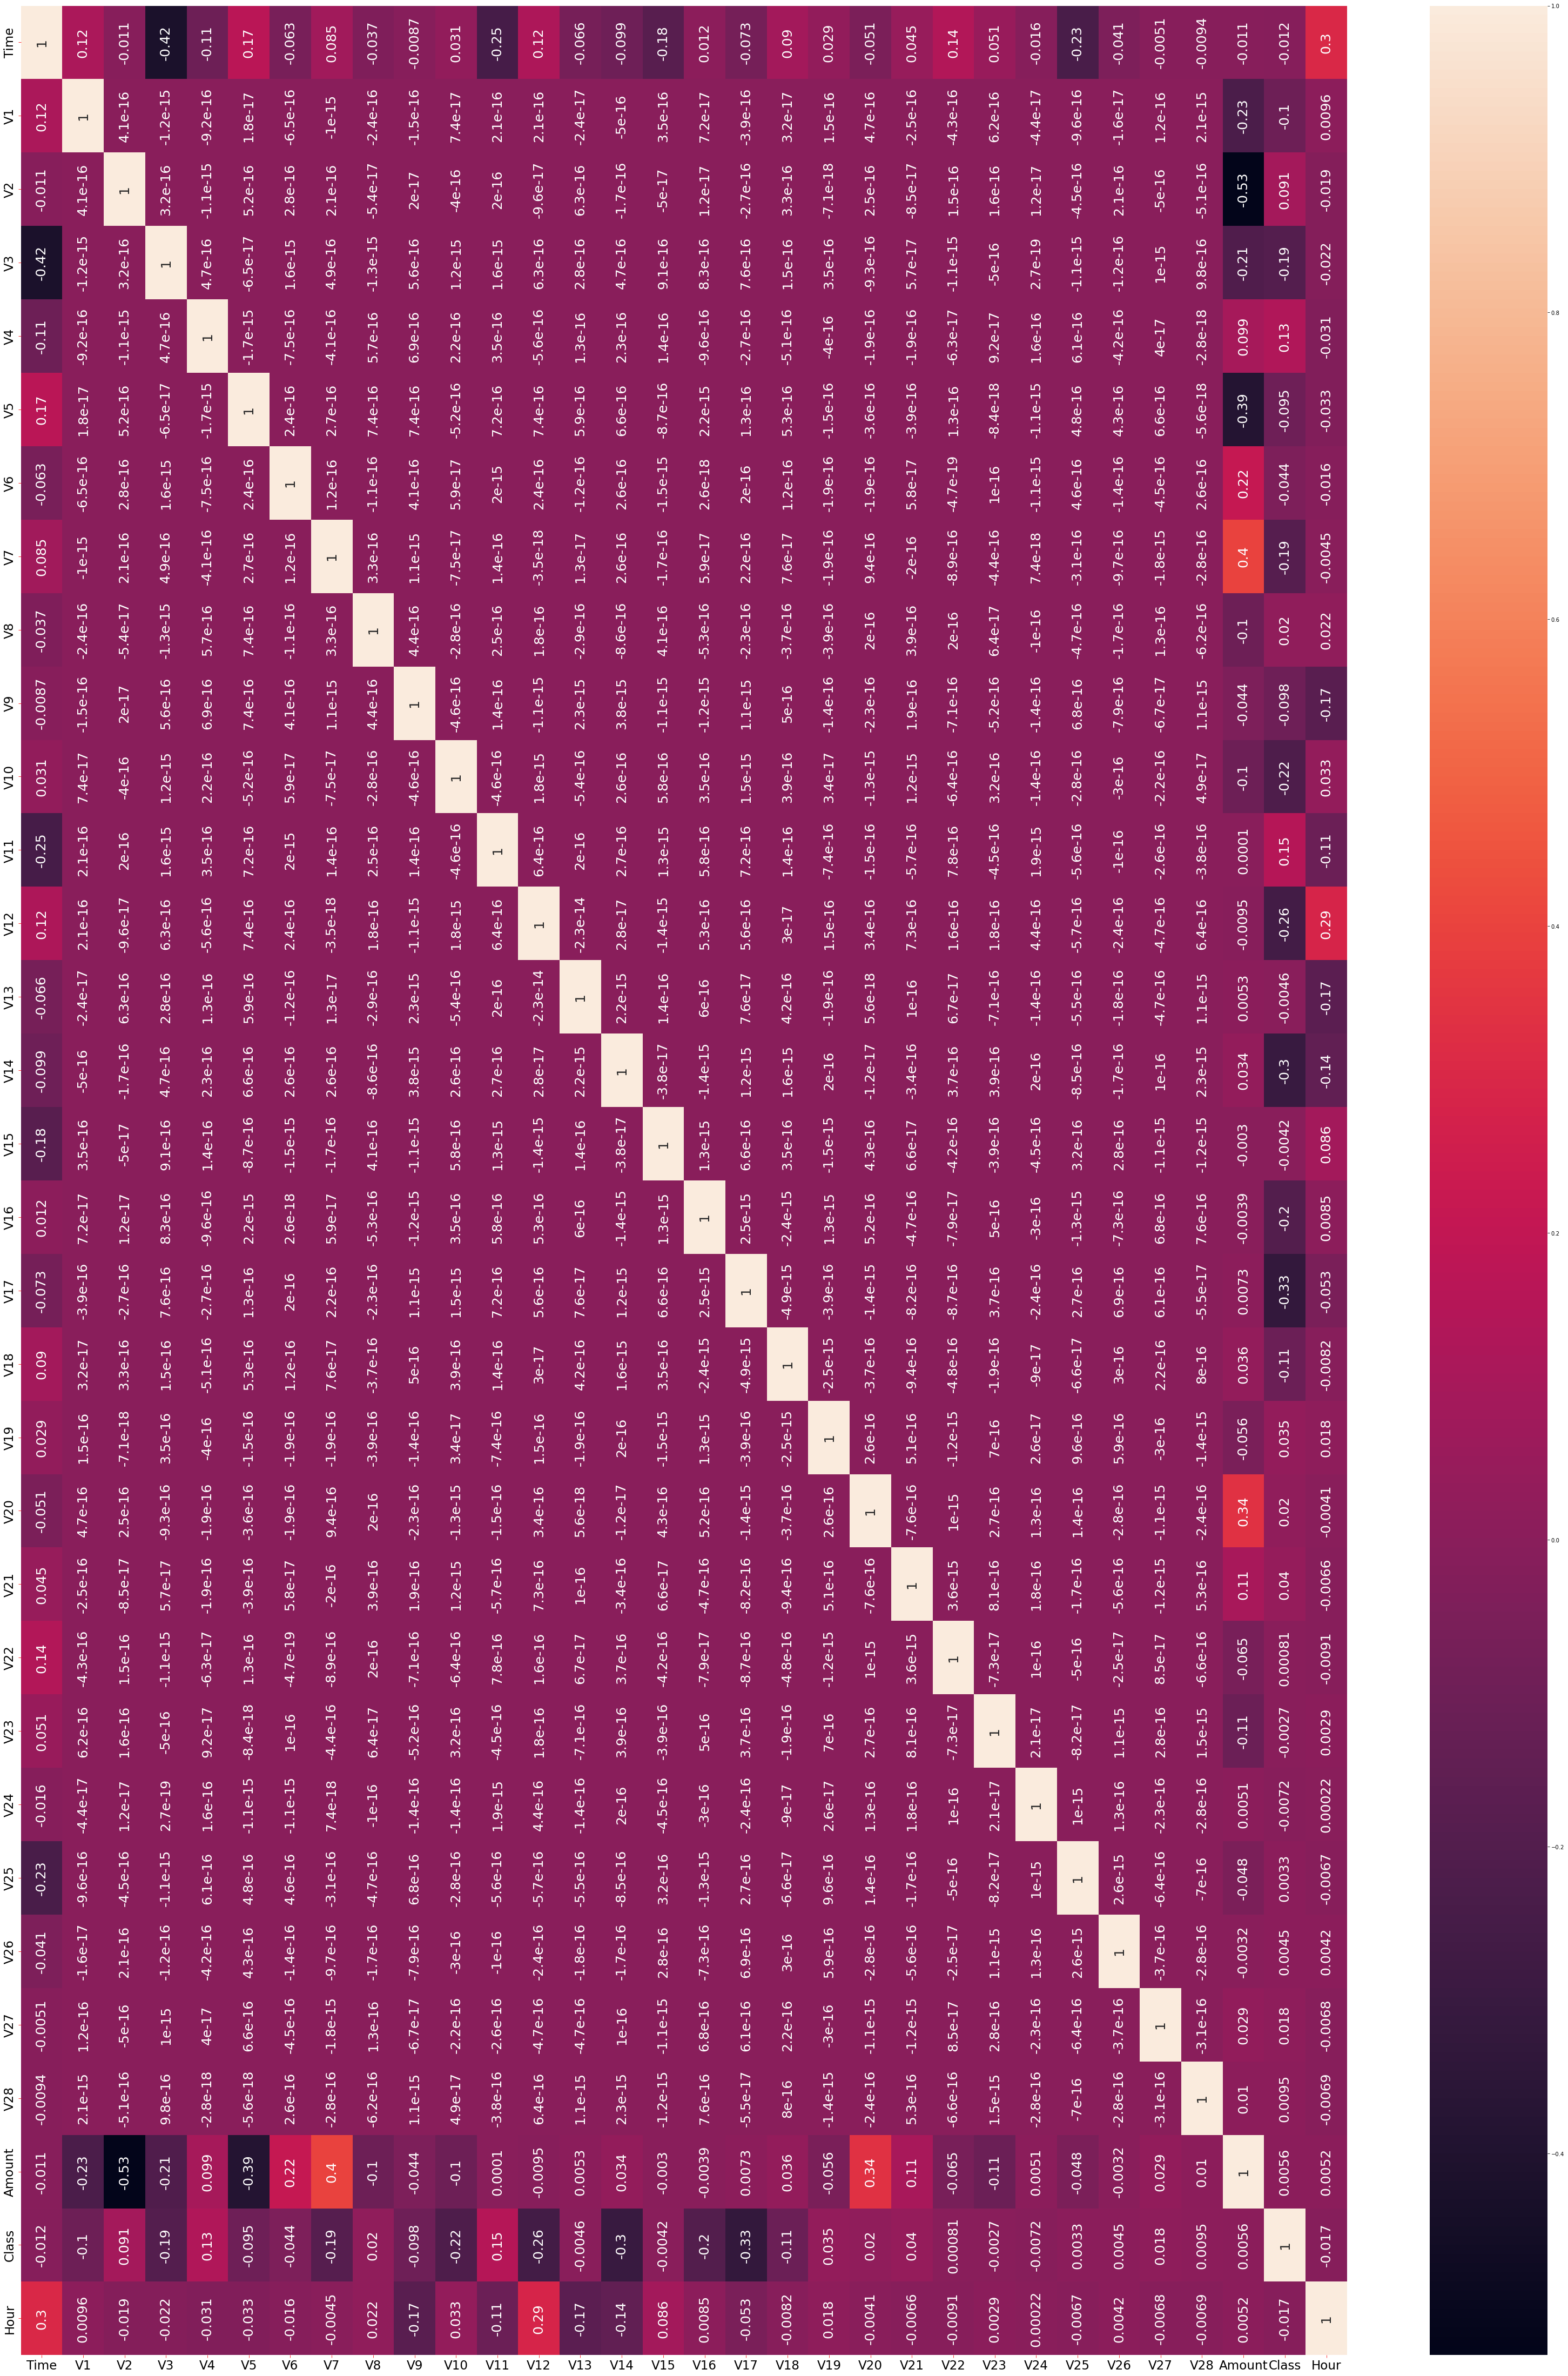

In [9]:
plt.figure(figsize=(55,80))
annot_kws={"fontsize":25,
          "rotation":"vertical"}
ax=sns.heatmap(data.corr(), annot=True, annot_kws = annot_kws)
ax.tick_params(size=5,color='r',labelsize=23,labelcolor='k')
plt.show()

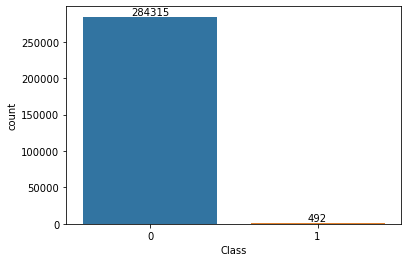

In [10]:
sns.countplot(x = "Class", data = data, )

counts_column1 = data['Class'].value_counts()
for index, value in enumerate(counts_column1):
    plt.text(index, value, str(value), ha='center', va='bottom')
    
plt.show()

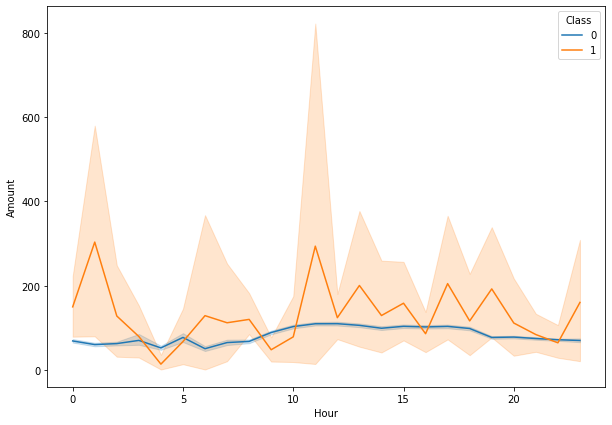

In [11]:
plt.figure(figsize=(10,7))
sns.lineplot(x=data["Hour"], y=data['Amount'], data=data, hue=data['Class'])
plt.show()

# SPLIT THE DATASET

In [12]:
x= data.drop('Class', axis=1)
y = data['Class']
print("Shape of X = ",x.shape)
print("Shape of Y = ",y.shape)

Shape of X =  (284807, 31)
Shape of Y =  (284807,)


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)

print("Shape of X_train = ", x_train.shape)
print("Shape of X_test = ", x_test.shape)
print("Shape of y_train = ", y_train.shape)
print("Shape of y_test = ", y_test.shape)

Shape of X_train =  (199364, 31)
Shape of X_test =  (85443, 31)
Shape of y_train =  (199364,)
Shape of y_test =  (85443,)


# MODEL FITTING

In [14]:
DecisionTree = DecisionTreeClassifier()

DecisionTree.fit(x_train, y_train)
DecisionTree_score = DecisionTree.score(x_test, y_test)
DecisionTree_score

0.9992626663389628

In [15]:
RandomForest = RandomForestClassifier()

RandomForest.fit(x_train, y_train)
RandomForest_score = RandomForest.score(x_test, y_test)
RandomForest_score

0.9995318516437859

In [16]:
gaussion = GaussianNB()

gaussion.fit(x_train, y_train)
gaussion_score = gaussion.score(x_test, y_test)
gaussion_score

0.992287255831373

In [17]:
bernoulli = BernoulliNB()

bernoulli.fit(x_train, y_train)
bernoulli_score = bernoulli.score(x_test, y_test)
bernoulli_score

0.9991105181231933

# PREDICTION MODEL AND ASSOCIATED SCORES

In [18]:
score_table = pd.DataFrame({"Test":['Decision Tree', 'Random Forest', 'Gaussion NB', 'Bernoulli NB'], 
              "Score":[DecisionTree_score, RandomForest_score, gaussion_score, 
                       bernoulli_score]})
score_table

,Test,Score
0,Decision Tree,0.999263
1,Random Forest,0.999532
2,Gaussion NB,0.992287
3,Bernoulli NB,0.999111


# PREDICTION

In [19]:
DecisionTree_pred = DecisionTree.predict(x_test)
DecisionTree_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [20]:
RandomForest_pred = RandomForest.predict(x_test)
RandomForest_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
gaussion_pred = gaussion.predict(x_test)
gaussion_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
bernoulli_pred = bernoulli.predict(x_test)
bernoulli_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# ACTUAL VALUE AND PREDICTED VALUE 

In [23]:
pred_table = pd.DataFrame({"Actual": y_test, "Decision Tree": DecisionTree_pred, 'Random Forest': RandomForest_pred, 
                           'Gaussion NB': gaussion_pred, 'Bernoulli NB': bernoulli_pred})
pred_table.head()

,Actual,Decision Tree,Random Forest,Gaussion NB,Bernoulli NB
40312,0,0,0,0,0
8353,0,0,0,0,0
100133,0,0,0,0,0
113766,0,0,0,0,0
31765,0,0,0,0,0
